# Chapter 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys, os
sys.path.append('..')

from udon.preprocess.polynomial import PolynomialFeatures
from udon.linear.linear_regression import LinearRegression
from udon.linear.ridge_regression import RidgeRegression
np.random.seed(114514)

# 1.1 Polynomial Curve Fitting
多項式曲線フィッティング  
Ref, Fig 1.2.

In [3]:
def create_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2* np.pi * x)

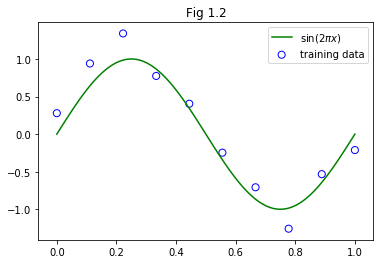

In [4]:
x_train, y_train = create_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor='none', edgecolor='b', s=50, label='training data')
plt.plot(x_test, y_test, c='g', label='$\sin(2\pi x)$')
plt.legend()
plt.title('Fig 1.2')
plt.show()

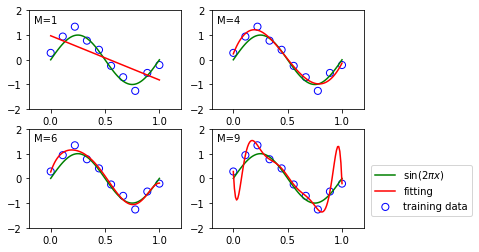

In [5]:
dims = [1, 4, 6, 9]
for i, degree in enumerate(dims):
    plt.subplot(2, 2, i+1)
    feature = PolynomialFeatures(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    
    plt.scatter(x_train, y_train, facecolor='none', edgecolor='b', s=50, label='training data')
    plt.plot(x_test, y_test, c='g', label='$\sin(2\pi x)$')
    plt.plot(x_test, y, c='r', label='fitting')
    plt.ylim(-2.0, 2.0)
    plt.xlim(-0.2, 1.2)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1.5))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
# plt.title('Fig 1.4')
plt.show()

## RMSE, root mean square error
無次元化してMの値に寄らず比較. rootで目的変数$t$と同じ次元

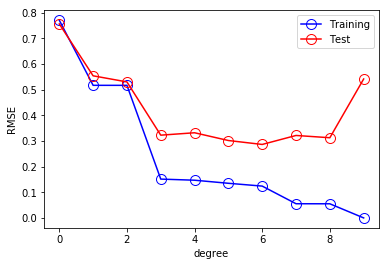

In [6]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a-b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeatures(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test),
                            y_test+np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc='none', mec='b', ms=10, c='b', label='Training')
plt.plot(test_errors, 'o-', mfc='none', mec='r', ms=10, c='r', label='Test')
plt.legend()
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.show()
    

## Regularization

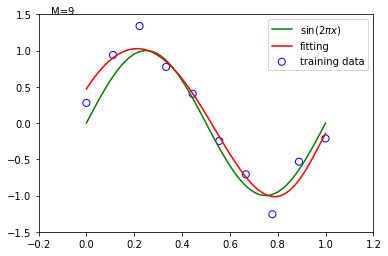

In [7]:
feature = PolynomialFeatures(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

plt.scatter(x_train, y_train, facecolor='none', edgecolor='b', s=50, label='training data')
plt.plot(x_test, y_test, c='g', label='$\sin(2\pi x)$')
plt.plot(x_test, y, c='r', label='fitting')
plt.ylim(-1.5, 1.5)
plt.xlim(-0.2, 1.2)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1.5))
plt.show()


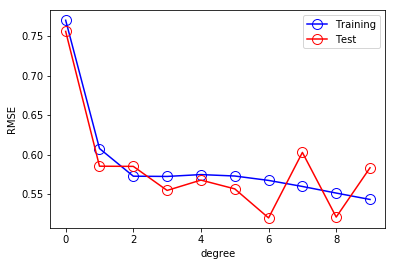

In [8]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a-b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeatures(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    
#     model = LinearRegression()
    model = RidgeRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test),
                            y_test+np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc='none', mec='b', ms=10, c='b', label='Training')
plt.plot(test_errors, 'o-', mfc='none', mec='r', ms=10, c='r', label='Test')
plt.legend()
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.show()